### 학습관련기술들   
각 Optimizer를 활용하여 MNIST 데이터 학습시 최적화를 수행하는 프로그램을 구현하라

In [ ]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

======= iteraton: 0==========
SGD:2.2992623596770727
Momentum:2.4635934420378085
AdaGrad:2.1633229376618814
Adam:2.236958071256244
======= iteraton: 100==========
SGD:1.62945027971552
Momentum:0.4759128856959126
AdaGrad:0.19946194387273064
Adam:0.37383752952758176
======= iteraton: 200==========
SGD:0.8467710773106737
Momentum:0.23666988130984223
AdaGrad:0.08720650102967523
Adam:0.18819674525098115
======= iteraton: 300==========
SGD:0.5254817868817123
Momentum:0.1614341645982281
AdaGrad:0.05748172137426215
Adam:0.10979620826326486
======= iteraton: 400==========
SGD:0.44632151075263327
Momentum:0.2617330049206027
AdaGrad:0.06463532025633287
Adam:0.17689225974127754
======= iteraton: 500==========
SGD:0.40985488596697284
Momentum:0.15046706264553567
AdaGrad:0.052451896431306426
Adam:0.07795924757305388
======= iteraton: 600==========
SGD:0.4001580551019582
Momentum:0.1449635480334242
AdaGrad:0.03349100093200447
Adam:0.14934201259820162
======= iteraton: 700==========
SGD:0.410001228838

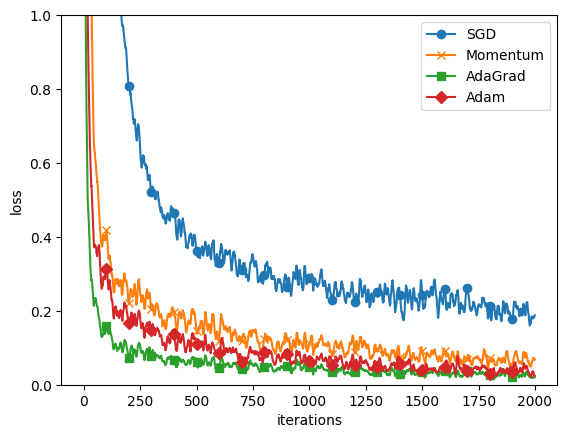

In [2]:
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

# 0. MNIST 데이터 읽기
# train 6만장, test 1만장
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

hidden_size = 100
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000 # 2천회만 반복하여 초기 부분의 속도차이를 확인해보자

# 1. 실험용 설정
optimizers = {}
optimizers["SGD"] = SGD()
optimizers["Momentum"] = Momentum()
optimizers["AdaGrad"] = AdaGrad()
optimizers["Adam"] = Adam()

networks = {}
train_loss = {}

for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[hidden_size, hidden_size, hidden_size, hidden_size],
        output_size=10)
    train_loss[key] = []

# 2. 훈련 시작
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("======= iteraton: "+str(i)+"==========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)

for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)


print("hidden_size:", hidden_size)

plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0,1)
plt.legend()
plt.show()
